# Income

Shapefile: https://vgin.vdem.virginia.gov/datasets/777890ecdb634d18a02eec604db522c6/about

In [211]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point

Clean up the csv

In [212]:
income = pd.read_csv('../Data/HDPulse_data_export.csv', skiprows = 3, skipfooter = 8)

/var/folders/w2/vspf2xks0vj7x2vwsrfjnszh0000gp/T/ipykernel_1906/1767880313.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  income = pd.read_csv('../Data/HDPulse_data_export.csv', skiprows = 3, skipfooter = 8)


In [213]:
income.head()

,County,FIPS,Value (Dollars),Rank within US (of 3141 counties)
0,United States,0,"78,538",NaN
1,Virginia,51000,"90,974",12 of 52
2,Norton City,51720,"38,497","3,071"
3,Galax City,51640,"41,438","3,022"
4,Buchanan County,51027,"42,216","2,997"


In [214]:
income = income.drop([0,1])
income

,County,FIPS,Value (Dollars),Rank within US (of 3141 counties)
2,Norton City,51720,"38,497","3,071"
3,Galax City,51640,"41,438","3,022"
4,Buchanan County,51027,"42,216","2,997"
5,Lee County,51105,"42,269","2,993"
6,Martinsville City,51690,"42,434","2,988"
...,...,...,...,...
130,Stafford County,51179,"133,792",18
131,Arlington County,51013,"140,160",12
132,Fairfax County,51059,"150,113",5
133,Falls Church City,51610,"154,734",4


In [215]:
alleghany = income.loc[income['County'] == 'Alleghany County and Clifton Forge City']
bedford = income.loc[income['County'] == 'Bedford City and County']
halifax = income.loc[income['County'] == 'Halifax County with South Boston City']

print(alleghany)
print(bedford)
print(halifax)

                                     County   FIPS Value (Dollars)  \
33  Alleghany County and Clifton Forge City  51005          55,160   

   Rank within US (of 3141 counties)  
33                             2,345  
                     County   FIPS Value (Dollars)  \
86  Bedford City and County  51917          77,644   

   Rank within US (of 3141 counties)  
86                               595  
                                   County   FIPS Value (Dollars)  \
19  Halifax County with South Boston City  51083          49,244   

   Rank within US (of 3141 counties)  
19                             2,731  


In [216]:
alleghany_row = alleghany.iloc[0].copy()

alleghany_county = alleghany_row.copy()
alleghany_county['County'] = 'Alleghany County'

clifton_forge = alleghany_row.copy()
clifton_forge['County'] = 'Clifton Forge City'

In [217]:
bedford_row = bedford.iloc[0].copy()

beford_county = bedford_row.copy()
beford_county['County'] = 'Bedford County'

beford_city = bedford_row.copy()
beford_city['County'] = 'Bedford City'

In [218]:
halifax_row = halifax.iloc[0].copy()

halifax_county = halifax_row.copy()
halifax_county['County'] = 'Halifax County'

south_boston = bedford_row.copy()
south_boston['County'] = 'South Boston City'

In [219]:
income = income.drop([alleghany.index[0], bedford.index[0], halifax.index[0]])
new_rows = pd.DataFrame([alleghany_county, clifton_forge, beford_county, beford_city, halifax_county, south_boston])

income = pd.concat([income, new_rows], ignore_index=True)

In [220]:
gdf = gpd.read_file('../Data/VirginiaAdministrativeBoundary_ClippedToShoreline/VirginiaCounty_ClippedToShoreline.shp')
gdf.head()

,STCOFIPS,GNIS,NAME,NAMELSAD,GSOURCE,LADOPT,LASTUPDATE,JURISTYPE,AREASQMI,Shape_Leng,Shape_Area,geometry
0,51001,1480091,Accomack,Accomack County,T,N,2014/08/20,CO,1195.366291,4.949957e+06,1.122306e+09,"MULTIPOLYGON (((335025.3 168192.902, 335027.85..."
1,51003,1675170,Albemarle,Albemarle County,L,Y,2021/03/29,CO,725.634334,2.310198e+05,1.879384e+09,"POLYGON ((99081.251 243000.641, 99436.591 2428..."
2,51005,1492459,Alleghany,Alleghany County,V,N,2014/09/15,CO,449.544769,2.062654e+05,1.164316e+09,"POLYGON ((-12982.332 208054.135, -12964.873 20..."
3,51007,1497770,Amelia,Amelia County,T,Y,2021/03/29,CO,360.945234,1.776617e+05,9.348439e+08,"POLYGON ((145558.574 158736.418, 145563.999 15..."
4,51009,1480095,Amherst,Amherst County,V,N,2020/09/11,CO,478.766949,1.876610e+05,1.240001e+09,"POLYGON ((55734.089 171342.588, 55732.855 1713..."


In [221]:
def clean_name(name):
    name = name.lower()
    name = name.replace('city of ', '')
    name = name.replace(' city', '')
    name = name.replace('town of ', '')
    name = name.replace(' town', '')
    return name

income['County'] = income['County'].apply(clean_name)
gdf['NAMELSAD'] = gdf['NAMELSAD'].apply(clean_name)

In [222]:
merged_gdf = income.merge(gdf, left_on="County", right_on="NAMELSAD", how="right")
merged_gdf = merged_gdf.dropna(subset=['County'])
merged_gdf

,County,FIPS,Value (Dollars),Rank within US (of 3141 counties),STCOFIPS,GNIS,NAME,NAMELSAD,GSOURCE,LADOPT,LASTUPDATE,JURISTYPE,AREASQMI,Shape_Leng,Shape_Area,geometry
0,accomack county,51001,"57,500","2,147",51001,1480091,Accomack,accomack county,T,N,2014/08/20,CO,1195.366291,4.949957e+06,1.122306e+09,"MULTIPOLYGON (((335025.3 168192.902, 335027.85..."
1,albemarle county,51003,"102,617",126,51003,1675170,Albemarle,albemarle county,L,Y,2021/03/29,CO,725.634334,2.310198e+05,1.879384e+09,"POLYGON ((99081.251 243000.641, 99436.591 2428..."
2,alleghany county,51005,"55,160","2,345",51005,1492459,Alleghany,alleghany county,V,N,2014/09/15,CO,449.544769,2.062654e+05,1.164316e+09,"POLYGON ((-12982.332 208054.135, -12964.873 20..."
3,amelia county,51007,"66,339","1,326",51007,1497770,Amelia,amelia county,T,Y,2021/03/29,CO,360.945234,1.776617e+05,9.348439e+08,"POLYGON ((145558.574 158736.418, 145563.999 15..."
4,amherst county,51009,"67,298","1,266",51009,1480095,Amherst,amherst county,V,N,2020/09/11,CO,478.766949,1.876610e+05,1.240001e+09,"POLYGON ((55734.089 171342.588, 55732.855 1713..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,suffolk,51800,"90,089",250,51800,1498560,Suffolk,suffolk,L,Y,2017/06/23,CI,428.933821,6.716418e+05,1.055535e+09,"MULTIPOLYGON (((262177.139 86912.233, 262177.0..."
129,virginia beach,51810,"90,685",243,51810,1498559,Virginia Beach,virginia beach,L,Y,2017/01/25,CI,408.144012,1.350634e+06,6.461162e+08,"MULTIPOLYGON (((310101.26 66996.538, 310107.55..."
130,waynesboro,51820,"56,364","2,248",51820,1498443,Waynesboro,waynesboro,L,Y,2014/06/16,CI,15.110987,3.244646e+04,3.913728e+07,"POLYGON ((52750.613 232999.672, 53088.146 2328..."
131,williamsburg,51830,"70,206","1,038",51830,1789076,Williamsburg,williamsburg,L,Y,2017/01/25,CI,9.032769,4.150800e+04,2.324663e+07,"MULTIPOLYGON (((247496.873 142380.179, 247499...."


In [223]:
merged_gdf['Value (Dollars)'] = merged_gdf['Value (Dollars)'].replace({'\$': '', ',': ''}, regex=True).astype(float)
merged_gdf['Value (Dollars)']

0       57500.0
1      102617.0
2       55160.0
3       66339.0
4       67298.0
         ...   
128     90089.0
129     90685.0
130     56364.0
131     70206.0
132     64648.0
Name: Value (Dollars), Length: 133, dtype: float64

In [224]:
merged_gdf = gpd.GeoDataFrame(merged_gdf, geometry="geometry", crs=gdf.crs)

<Axes: >

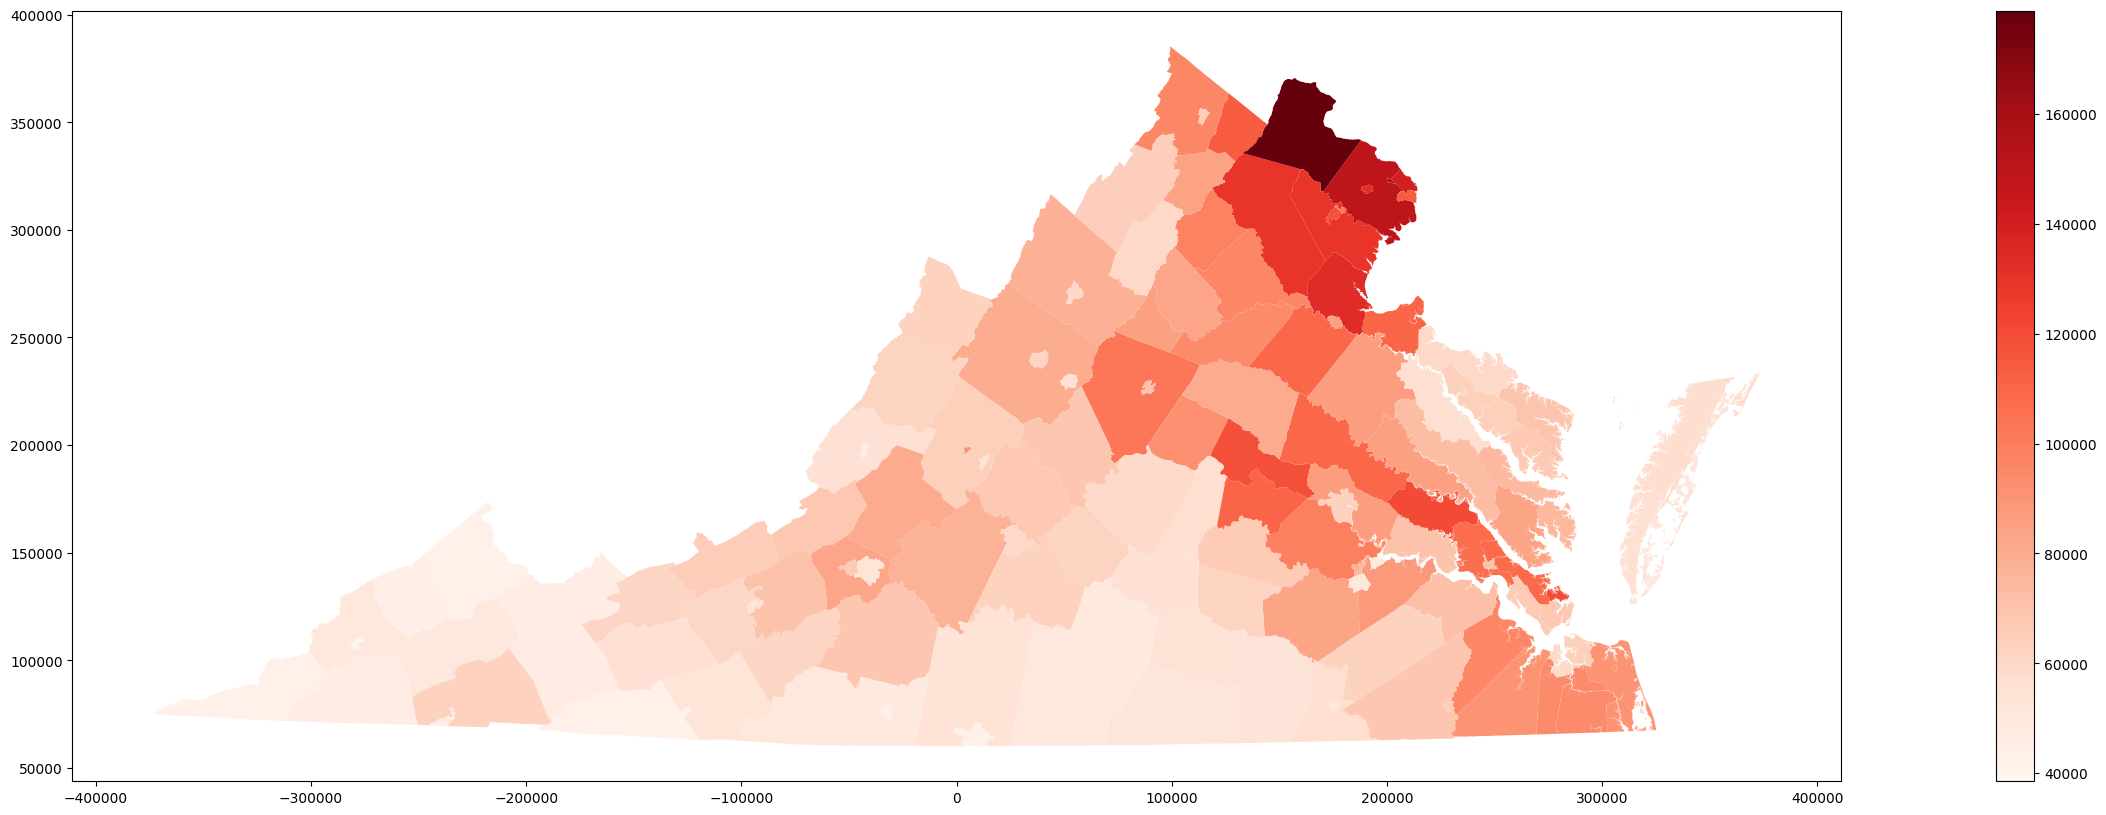

In [225]:
fig, ax = plt.subplots(figsize=(40, 10))
merged_gdf.plot(
    column='Value (Dollars)',
    cmap='Reds',
    legend=True,
    #edgecolor='black',
    scheme = None,
    ax=ax
)